In [ ]:
# Importing Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# set path
path = r'/Users/lamarosavio/Documents/Instacart Basket Analysis'

In [5]:
# Import most up-to-date project data
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

# Provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

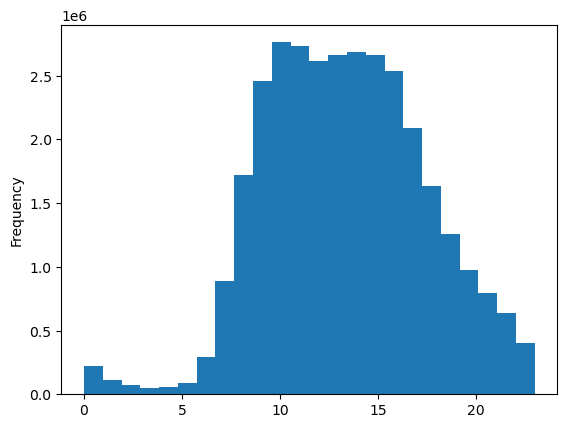

In [8]:
hist = instacart['order_hour_of_day'].plot.hist(bins = 24)

The histogram shows peaks throughout the day, specifically showing at what times of the day are the most orders are placed. If this peak occurs during midday or early evening, it might suggest that customers prefer to shop during their lunch hours or directly after work. The shape of the distribution could tell us if the ordering pattern is concentrated at a specific time. A normal distribution might suggest a consistent shopping pattern centered around a particular time, while a skewed distribution could indicates shoppers prefer to shop during specific times.

# The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

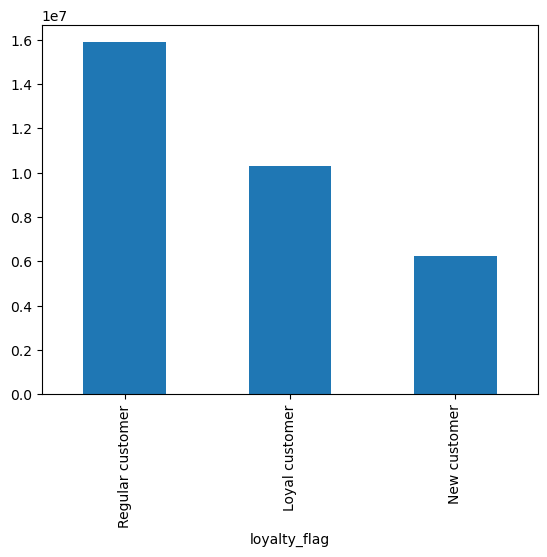

In [12]:
bar = instacart['loyalty_flag'].value_counts().plot.bar()

# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [17]:
# Create a random sample by generating a seed
np.random.seed(4)

In [19]:
# Create a dev list based on the data split we want (70/30)
dev = np.random.rand(len(instacart)) <= 0.7

In [21]:
# Split the dataframe into two samples
big = instacart[dev]
small = instacart[~dev]

In [23]:
# Compare the dataframe length to the sum of the big and small samples
len(instacart)

32404859

In [25]:
len(big) + len(small)

32404859

In [27]:
# Reduce the samples to only the columns needed
instacart_2 = small [['order_hour_of_day','prices']]

In [29]:
# Check if the subset of the sample was made properly
instacart_2.head(5)

,order_hour_of_day,prices
0,11,5.8
2,21,5.8
3,13,5.8
6,14,5.8
10,11,5.8


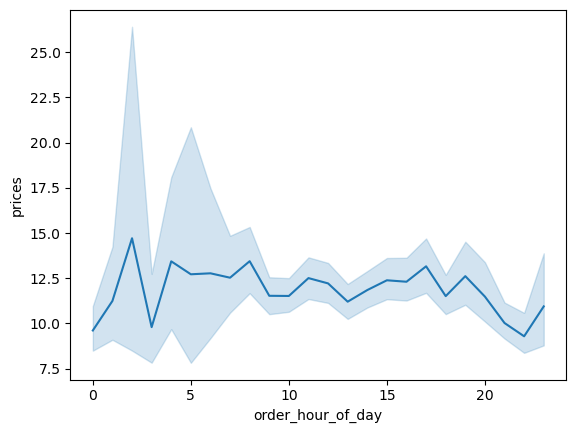

In [31]:
# Create a line chart
line = sns.lineplot(data = instacart_2, x = 'order_hour_of_day',y = 'prices')

# Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [34]:
# Reduce previously made sample to only the columns needed
instacart_3 = small [['age','n_dependants']]

In [36]:
# Check if the subset of the sample was made properly
instacart_3.head(5)

,age,n_dependants
0,81,1
2,66,2
3,40,3
6,20,3
10,61,1


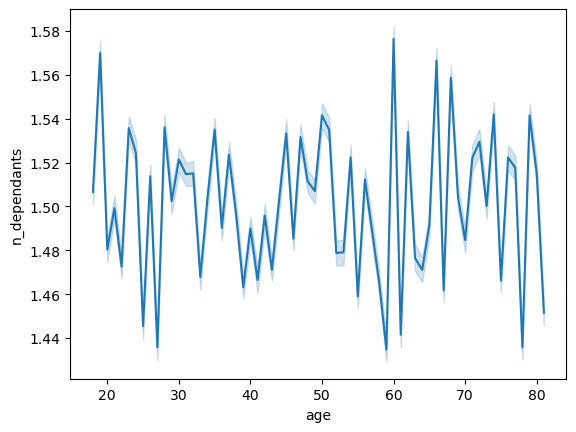

In [38]:
# Create a line chart
line_2 = sns.lineplot(data = instacart_3, x = 'age',y = 'n_dependants')

There are no patterns to analyze here

# Explore whether there’s a connection between age and spending power (income)

In [42]:
# Reduce previously made sample to only the columns needed
instacart_4 = small [['age','income']]

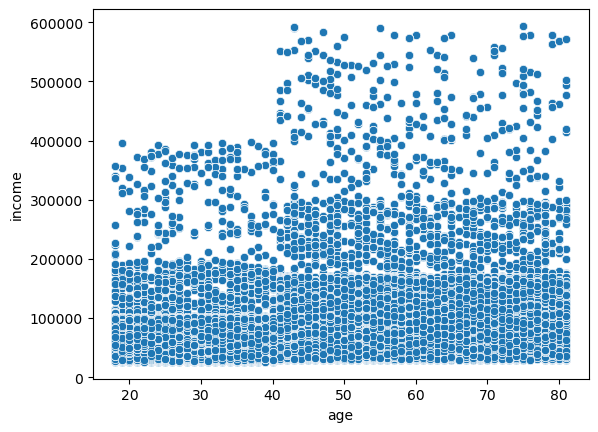

In [44]:
# Create a scatterplot
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = instacart_4)

There is a wide range of incomes specifically between ages 20 to 40, with a concentration at the lower end of the income scale. From  age 40 and onwards, there appears to be an upward trend in income. This suggests that income increases with age. The scatterplot provides a visualization that can leans toward the hypothesis that  potential increases in income comes with age, but this would require add'l analysis to understand the relationship between age and income among the customers.

# Export Visualizations

In [49]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day_frequency.png'))

In [51]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_distribution.png'))

In [53]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'change_in_price_over_hours_of_the_day.png'))

In [55]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_vs_n_dependants.png'))

In [57]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'change_in_spending_power_over_age.png'))